In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os

In [53]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_logical_device_configuration(gpus[0], [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
        print("complete GPU memory limit setting.")
    except RuntimeError as e:
        print(e)

complete GPU memory limit setting.


In [54]:
BATCH_SIZE = 64
TRAIN_PATH = "cifar/train"
TEST_PATH = "cifar/test"

In [55]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

model = Sequential([
    Conv2D(48, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(96, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])
model.summary()

Found 45000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 48)        1344      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 15, 15, 96)        41568     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 7, 192)         

In [56]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    verbose=1
)

Epoch 1/15
704/704 [==============================] - 17s 24ms/step - loss: 1.5027 - accuracy: 0.4524 - val_loss: 1.4328 - val_accuracy: 0.4918
Epoch 2/15
704/704 [==============================] - 17s 24ms/step - loss: 1.1324 - accuracy: 0.5980 - val_loss: 1.4429 - val_accuracy: 0.5106
Epoch 3/15
704/704 [==============================] - 17s 24ms/step - loss: 0.9863 - accuracy: 0.6556 - val_loss: 1.1564 - val_accuracy: 0.6170
Epoch 4/15
704/704 [==============================] - 17s 24ms/step - loss: 0.8941 - accuracy: 0.6878 - val_loss: 1.0230 - val_accuracy: 0.6434
Epoch 5/15
704/704 [==============================] - 18s 25ms/step - loss: 0.8327 - accuracy: 0.7132 - val_loss: 0.9489 - val_accuracy: 0.6730
Epoch 6/15
704/704 [==============================] - 17s 24ms/step - loss: 0.7698 - accuracy: 0.7333 - val_loss: 1.0459 - val_accuracy: 0.6340
Epoch 7/15
704/704 [==============================] - 17s 24ms/step - loss: 0.7109 - accuracy: 0.7536 - val_loss: 0.8786 - val_accuracy:

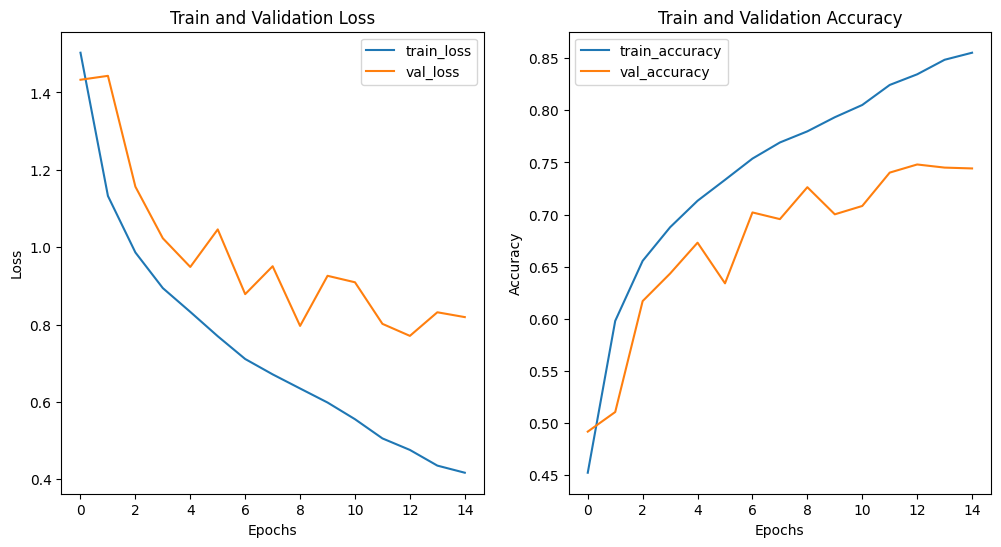

157/157 [==============================] - 6s 34ms/step - loss: 0.7951 - accuracy: 0.7502
Test Accuracy: 0.7502


In [58]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")